# ARMA Models in StatsModels - Lab 

## Introduction

In this lesson, you'll fit an ARMA model using `statsmodels` to a real-world dataset. 


## Objectives

In this lab you will: 

- Decide the optimal parameters for an ARMA model by plotting ACF and PACF and interpreting them 
- Fit an ARMA model using StatsModels 

## Dataset

Run the cell below to import the dataset containing the historical running times for the men's 400m in the Olympic games.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('winning_400m.csv')
data['year'] = pd.to_datetime(data['year'].astype(str))
data.set_index('year', inplace=True)
data.index = data.index.to_period("Y")

In [2]:
# Preview the dataset
data

,winning_times
year,
1900,49.4
1904,49.2
1908,50.0
1912,48.2
1920,49.6
1924,47.6
1928,47.8
1932,46.2
1936,46.5


Plot this time series data. 

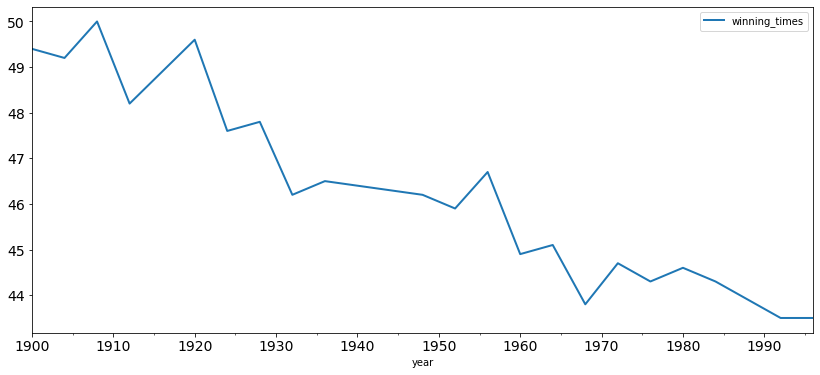

In [3]:
# Plot the time series
data.plot(figsize=(14,6), linewidth=2, fontsize=14);
plt.show()

If you plotted the time series correctly, you should notice that it is not stationary. So, difference the data to get a stationary time series. Make sure to remove the missing values.

In [10]:
# Difference the time series
data_diff = data.diff(periods=1)
data_diff

,winning_times
year,
1900,NaN
1904,-0.2
1908,0.8
1912,-1.8
1920,1.4
1924,-2.0
1928,0.2
1932,-1.6
1936,0.3


In [16]:
data_diff.dropna(inplace=True)
data_diff

,winning_times
year,
1904,-0.2
1908,0.8
1912,-1.8
1920,1.4
1924,-2.0
1928,0.2
1932,-1.6
1936,0.3
1948,-0.3


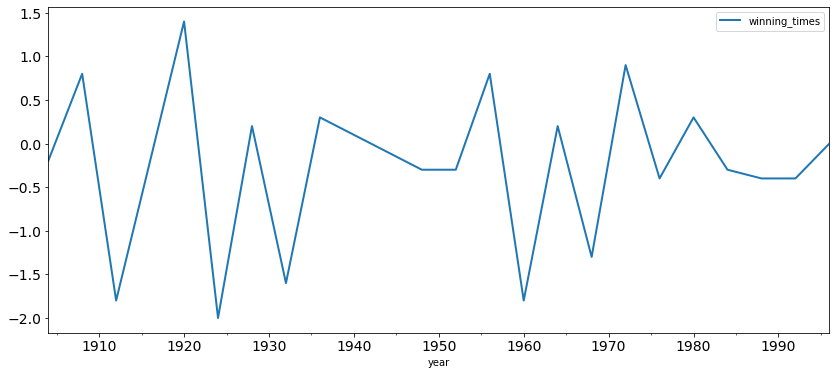

In [35]:
data_diff.plot(figsize=(14,6), linewidth=2, fontsize=14);
plt.show()

Use `statsmodels` to plot the ACF and PACF of this differenced time series. 

In [17]:
# imports
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

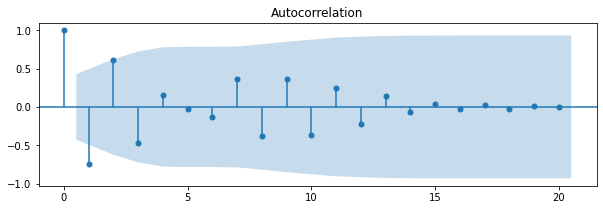

In [23]:
# Plot the ACF
fig, ax = plt.subplots(figsize=(10,3))
plot_acf(data_diff, ax=ax, lags=20);

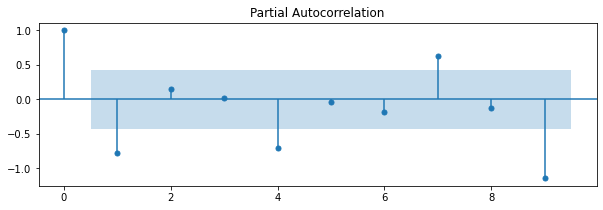

In [24]:
# Plot the PACF
fig, ax = plt.subplots(figsize=(10,3))
plot_pacf(data_diff, ax=ax, lags=9);

Based on the ACF and PACF, fit an ARMA model with the right orders for AR and MA. Feel free to try different models and compare AIC and BIC values, as well as significance values for the parameter estimates. 

In [25]:
#import ARMA
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm

In [26]:
# Instantiate an AR model
arma = ARMA(data_diff, order=(1,0))

# Fit the model to data
fit_arma = arma.fit()

# Print out summary information on the fit
print(fit_arma.summary())

                              ARMA Model Results                              
Dep. Variable:          winning_times   No. Observations:                   21
Model:                     ARMA(1, 0)   Log Likelihood                 -20.054
Method:                       css-mle   S.D. of innovations              0.618
Date:                Sun, 21 Aug 2022   AIC                             46.107
Time:                        19:50:49   BIC                             49.241
Sample:                    12-31-1904   HQIC                            46.787
                         - 12-31-1996                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2885      0.080     -3.602      0.000      -0.445      -0.131
ar.L1.winning_times    -0.7186      0.137     -5.262      0.000      -0.986      -0.451
                

In [28]:
# Print out the estimate for the constant and for theta
print(fit_arma.params)

const                 -0.288457
ar.L1.winning_times   -0.718619
dtype: float64


In [29]:
# Instantiate an AR model
ar_arma = ARMA(data_diff, order=(0,1))

# Fit the model to data
fit_ar_arma = ar_arma.fit()

# Print out summary information on the fit
print(fit_ar_arma.summary())

                              ARMA Model Results                              
Dep. Variable:          winning_times   No. Observations:                   21
Model:                     ARMA(0, 1)   Log Likelihood                 -22.654
Method:                       css-mle   S.D. of innovations              0.661
Date:                Sun, 21 Aug 2022   AIC                             51.308
Time:                        20:06:40   BIC                             54.442
Sample:                    12-31-1904   HQIC                            51.988
                         - 12-31-1996                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.3108      0.022    -13.990      0.000      -0.354      -0.267
ma.L1.winning_times    -1.0000        nan        nan        nan         nan         nan
                

/home/dyfrey/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


In [34]:
# Print out the estimate for the constant and for theta
print(fit_ar_arma.params)

const                 -0.310841
ma.L1.winning_times   -1.000000
dtype: float64


## What is your final model? Why did you pick this model?

In [36]:
# Your comments here
'''
The final prefered model is the moving average (MA) model. This is because it has the lowest
Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC) values. I picked the model with 
the lowest of these two values since both scores show a model's complexity; minimized scores highlight models 
with therefore the prefered models for having less complexity hence the choice.
'''

"\nThe final prefered model is the moving average (MA) model. This is because it has the lowest\nAkaike Information Criterion (AIC) and Bayesian Information Criterion (BIC) values. I picked the model with \nthe lowest of these two values since both scores show a model's complexity; minimized scores highlight models \nwith therefore the prefered models for having less complexity hence the choice.\n"

## Summary 

Well done. In addition to manipulating and visualizing time series data, you now know how to create a stationary time series and fit ARMA models. 